<a href="https://colab.research.google.com/github/hannesstuehrenberg/Probabilistic-Machine-Learning_lecture-PROJECTS/blob/08-1SHXXXX_football_analytics/projects/08-1SHXXXX_football_analytics/notebooks/03_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3. Data Preprocessing
- Steps taken to clean or transform the data


In [ ]:
!pip install mplsoccer

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86.2/86.2 kB 5.0 MB/s eta 0:00:00


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch
from mplsoccer import Sbopen
from tqdm import tqdm
import gdown

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Initialize parser
parser = Sbopen()

In [ ]:
matches_df = parser.match(competition_id=72, season_id=107)
match_ids = matches_df['match_id'].tolist()

all_shots = []

for match_id in match_ids:
    df_event, df_related, df_freeze, df_tactics = parser.event(match_id)

    df_shots = df_event[df_event['type_name'] == 'Shot'].copy()

    df_shots['match_id'] = match_id

    all_shots.append(df_shots)

shots_master_women_world_cup_df = pd.concat(all_shots, ignore_index=True)

In [ ]:
#Lets look at the example dataset from the Women's World Cup 2023 again. It consisted of 1680 shots. 184 of them were goals.
num_goals = shots_master_women_world_cup_df[shots_master_women_world_cup_df['outcome_name'] == 'Goal'].shape[0]
print(f"Number of goals: {num_goals}")


Number of goals: 184


In [ ]:
#As many more competitions are available the next step is to create a shots_master_df for all shots from all competitions to enrich the dataset on which to train the models later.

#During data loading and exploration these columns were discovered to always be NaN for type_name = Shot. Therefore, they are not of interest for the shots_master_df
irrelevant_columns = [
    'tactics_formation', 'pass_recipient_id', 'pass_recipient_name', 'pass_length',
    'pass_angle', 'pass_height_id', 'pass_height_name', 'counterpress', 'pass_switch',
    'block_deflection', 'pass_cross', 'pass_assisted_shot_id', 'pass_shot_assist',
    'goalkeeper_position_id', 'goalkeeper_position_name', 'foul_committed_card_id',
    'foul_committed_card_name', 'ball_recovery_recovery_failure', 'foul_committed_advantage',
    'foul_won_advantage', 'foul_won_defensive', 'dribble_nutmeg', 'pass_goal_assist',
    'substitution_replacement_id', 'substitution_replacement_name', 'bad_behaviour_card_id',
    'bad_behaviour_card_name', 'pass_cut_back', 'dribble_overrun', 'ball_recovery_offensive',
    'pass_no_touch', 'pass_deflected', 'foul_committed_penalty', 'foul_won_penalty',
    'injury_stoppage_in_chain', 'foul_committed_offensive', 'block_offensive',
    'pass_miscommunication', 'block_save_block', 'dribble_no_touch', 'player_off_permanent'
]

all_shots = []

df_competitions = parser.competition()

# Add mininterval or miniters to slow down tqdm output
for _, row in tqdm(df_competitions.iterrows(), total=len(df_competitions), desc="Competitions", mininterval=2.0):
    comp_id = row['competition_id']
    season_id = row['season_id']
    comp_name = row['competition_name']
    season_name = row['season_name']

    tqdm.write(f"\nüîÑ Processing {comp_name} - {season_name}...")

    try:
        matches_df = parser.match(competition_id=comp_id, season_id=season_id)
        match_ids = matches_df['match_id'].tolist()

        for match_id in tqdm(
            match_ids,
            desc=f"  Matches in {comp_name[:15]} {season_name}",
            leave=False,
            mininterval=20,
        ):
            try:
                df_event, df_related, df_freeze, df_tactics = parser.event(match_id)
                df_shots = df_event[df_event['type_name'] == 'Shot'].copy()
                df_shots['match_id'] = match_id
                all_shots.append(df_shots)
            except Exception as e:
                print(f"     ‚ùå Error in match_id {match_id}: {e}")

    except Exception as e:
        print(f"‚ùå Could not fetch matches for {comp_name} - {season_name}: {e}")

shots_master_df = pd.concat(all_shots, ignore_index=True)
shots_master_df = shots_master_df.drop(columns=[col for col in irrelevant_columns if col in shots_master_df.columns])

print("\n‚úÖ All done!")
print("üìä Final shape of shots_master_df:", shots_master_df.shape)


Competitions:   0%|          | 0/74 [00:00<?, ?it/s]


üîÑ Processing 1. Bundesliga - 2023/2024...



Competitions:   1%|‚ñè         | 1/74 [00:22<26:59, 22.19s/it]


üîÑ Processing 1. Bundesliga - 2015/2016...



Competitions:   3%|‚ñé         | 2/74 [03:36<2:27:54, 123.26s/it]


üîÑ Processing African Cup of Nations - 2023...



Competitions:   4%|‚ñç         | 3/74 [04:13<1:39:14, 83.86s/it]


üîÑ Processing Champions League - 2018/2019...



Competitions:   4%|‚ñç         | 3/74 [04:14<1:39:14, 83.86s/it]


üîÑ Processing Champions League - 2017/2018...



Competitions:   7%|‚ñã         | 5/74 [04:15<42:33, 37.00s/it]


üîÑ Processing Champions League - 2016/2017...



Competitions:   7%|‚ñã         | 5/74 [04:16<42:33, 37.00s/it]


üîÑ Processing Champions League - 2015/2016...



Competitions:   7%|‚ñã         | 5/74 [04:17<42:33, 37.00s/it]


üîÑ Processing Champions League - 2014/2015...



Competitions:  11%|‚ñà         | 8/74 [04:18<18:56, 17.21s/it]


üîÑ Processing Champions League - 2013/2014...



Competitions:  11%|‚ñà         | 8/74 [04:18<18:56, 17.21s/it]


üîÑ Processing Champions League - 2012/2013...



Competitions:  11%|‚ñà         | 8/74 [04:19<18:56, 17.21s/it]


üîÑ Processing Champions League - 2011/2012...



Competitions:  15%|‚ñà‚ñç        | 11/74 [04:20<10:31, 10.03s/it]


üîÑ Processing Champions League - 2010/2011...



Competitions:  15%|‚ñà‚ñç        | 11/74 [04:21<10:31, 10.03s/it]


üîÑ Processing Champions League - 2009/2010...



Competitions:  15%|‚ñà‚ñç        | 11/74 [04:22<10:31, 10.03s/it]


üîÑ Processing Champions League - 2008/2009...



Competitions:  19%|‚ñà‚ñâ        | 14/74 [04:23<06:30,  6.50s/it]


üîÑ Processing Champions League - 2006/2007...



Competitions:  19%|‚ñà‚ñâ        | 14/74 [04:24<06:30,  6.50s/it]


üîÑ Processing Champions League - 2004/2005...



Competitions:  19%|‚ñà‚ñâ        | 14/74 [04:25<06:30,  6.50s/it]


üîÑ Processing Champions League - 2003/2004...



Competitions:  23%|‚ñà‚ñà‚ñé       | 17/74 [04:26<04:18,  4.54s/it]


üîÑ Processing Champions League - 1999/2000...



Competitions:  23%|‚ñà‚ñà‚ñé       | 17/74 [04:27<04:18,  4.54s/it]


üîÑ Processing Champions League - 1972/1973...



Competitions:  23%|‚ñà‚ñà‚ñé       | 17/74 [04:28<04:18,  4.54s/it]


üîÑ Processing Champions League - 1971/1972...



Competitions:  27%|‚ñà‚ñà‚ñã       | 20/74 [04:29<02:59,  3.33s/it]


üîÑ Processing Champions League - 1970/1971...



Competitions:  27%|‚ñà‚ñà‚ñã       | 20/74 [04:29<02:59,  3.33s/it]


üîÑ Processing Copa America - 2024...



Competitions:  30%|‚ñà‚ñà‚ñâ       | 22/74 [04:52<04:38,  5.35s/it]


üîÑ Processing Copa del Rey - 1983/1984...



Competitions:  30%|‚ñà‚ñà‚ñâ       | 22/74 [04:53<04:38,  5.35s/it]


üîÑ Processing Copa del Rey - 1982/1983...



Competitions:  30%|‚ñà‚ñà‚ñâ       | 22/74 [04:54<04:38,  5.35s/it]


üîÑ Processing Copa del Rey - 1977/1978...



Competitions:  34%|‚ñà‚ñà‚ñà‚ñç      | 25/74 [04:54<03:06,  3.81s/it]


üîÑ Processing FA Women's Super League - 2020/2021...



Competitions:  35%|‚ñà‚ñà‚ñà‚ñå      | 26/74 [06:29<13:10, 16.47s/it]


üîÑ Processing FA Women's Super League - 2019/2020...



Competitions:  36%|‚ñà‚ñà‚ñà‚ñã      | 27/74 [07:34<19:14, 24.57s/it]


üîÑ Processing FA Women's Super League - 2018/2019...



Competitions:  38%|‚ñà‚ñà‚ñà‚ñä      | 28/74 [08:51<26:38, 34.74s/it]


üîÑ Processing FIFA U20 World Cup - 1979...



Competitions:  38%|‚ñà‚ñà‚ñà‚ñä      | 28/74 [08:52<26:38, 34.74s/it]


üîÑ Processing FIFA World Cup - 2022...



Competitions:  41%|‚ñà‚ñà‚ñà‚ñà      | 30/74 [09:41<22:53, 31.22s/it]


üîÑ Processing FIFA World Cup - 2018...



Competitions:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 31/74 [10:28<24:41, 34.46s/it]


üîÑ Processing FIFA World Cup - 1990...



Competitions:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 31/74 [10:29<24:41, 34.46s/it]


üîÑ Processing FIFA World Cup - 1986...



Competitions:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 33/74 [10:31<15:20, 22.45s/it]


üîÑ Processing FIFA World Cup - 1974...



Competitions:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 33/74 [10:36<15:20, 22.45s/it]


üîÑ Processing FIFA World Cup - 1970...



Competitions:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 35/74 [10:40<10:33, 16.25s/it]


üîÑ Processing FIFA World Cup - 1962...



Competitions:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 35/74 [10:41<10:33, 16.25s/it]


üîÑ Processing FIFA World Cup - 1958...



Competitions:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 37/74 [10:43<07:01, 11.40s/it]


üîÑ Processing Indian Super league - 2021/2022...



Competitions:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 38/74 [12:04<14:47, 24.65s/it]


üîÑ Processing La Liga - 2020/2021...



Competitions:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 39/74 [12:33<14:55, 25.59s/it]


üîÑ Processing La Liga - 2019/2020...



Competitions:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 40/74 [13:00<14:40, 25.91s/it]


üîÑ Processing La Liga - 2018/2019...



Competitions:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 41/74 [13:27<14:26, 26.26s/it]


üîÑ Processing La Liga - 2017/2018...



Competitions:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 42/74 [13:56<14:16, 26.78s/it]


üîÑ Processing La Liga - 2016/2017...



Competitions:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 43/74 [14:21<13:40, 26.48s/it]


üîÑ Processing La Liga - 2015/2016...



Competitions:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 44/74 [19:03<49:03, 98.11s/it]


üîÑ Processing La Liga - 2014/2015...



Competitions:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 45/74 [19:33<37:59, 78.61s/it]


üîÑ Processing La Liga - 2013/2014...



Competitions:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 46/74 [19:58<29:26, 63.10s/it]


üîÑ Processing La Liga - 2012/2013...



Competitions:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 47/74 [20:24<23:33, 52.34s/it]


üîÑ Processing La Liga - 2011/2012...



Competitions:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 48/74 [20:55<19:53, 45.89s/it]


üîÑ Processing La Liga - 2010/2011...



Competitions:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 49/74 [21:21<16:44, 40.17s/it]


üîÑ Processing La Liga - 2009/2010...



Competitions:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 50/74 [21:47<14:23, 35.98s/it]


üîÑ Processing La Liga - 2008/2009...



Competitions:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 51/74 [22:11<12:22, 32.28s/it]


üîÑ Processing La Liga - 2007/2008...



Competitions:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 52/74 [22:32<10:34, 28.85s/it]


üîÑ Processing La Liga - 2006/2007...



Competitions:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 53/74 [22:52<09:08, 26.12s/it]


üîÑ Processing La Liga - 2005/2006...



Competitions:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 54/74 [23:04<07:21, 22.06s/it]


üîÑ Processing La Liga - 2004/2005...



Competitions:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 55/74 [23:09<05:23, 17.01s/it]


üîÑ Processing La Liga - 1973/1974...



Competitions:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 55/74 [23:10<05:23, 17.01s/it]


üîÑ Processing Liga Profesional - 1997/1998...



Competitions:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 55/74 [23:11<05:23, 17.01s/it]


üîÑ Processing Liga Profesional - 1981...



Competitions:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 58/74 [23:12<02:07,  7.94s/it]


üîÑ Processing Ligue 1 - 2022/2023...



Competitions:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 59/74 [23:39<02:59, 11.99s/it]


üîÑ Processing Ligue 1 - 2021/2022...



Competitions:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 60/74 [24:01<03:20, 14.32s/it]


üîÑ Processing Ligue 1 - 2015/2016...



Competitions:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 61/74 [28:54<18:07, 83.68s/it]


üîÑ Processing Major League Soccer - 2023...



Competitions:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 62/74 [28:59<12:36, 63.05s/it]


üîÑ Processing North American League - 1977...



Competitions:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 62/74 [29:00<12:36, 63.05s/it]


üîÑ Processing NWSL - 2018...



Competitions:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 64/74 [29:25<06:56, 41.63s/it]


üîÑ Processing Premier League - 2015/2016...



Competitions:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 65/74 [34:07<14:41, 97.96s/it]


üîÑ Processing Premier League - 2003/2004...



Competitions:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 66/74 [34:35<10:41, 80.23s/it]


üîÑ Processing Serie A - 2015/2016...



Competitions:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 67/74 [39:35<16:07, 138.18s/it]


üîÑ Processing Serie A - 1986/1987...



Competitions:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 67/74 [39:36<16:07, 138.18s/it]


üîÑ Processing UEFA Euro - 2024...



Competitions:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 69/74 [40:15<07:16, 87.36s/it]


üîÑ Processing UEFA Euro - 2020...



Competitions:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 70/74 [40:54<05:04, 76.04s/it]


üîÑ Processing UEFA Europa League - 1988/1989...



Competitions:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 71/74 [40:56<02:52, 57.51s/it]


üîÑ Processing UEFA Women's Euro - 2022...



Competitions:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 72/74 [41:19<01:36, 48.36s/it]


üîÑ Processing Women's World Cup - 2023...



Competitions:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 73/74 [41:58<00:45, 45.85s/it]


üîÑ Processing Women's World Cup - 2019...



Competitions: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 74/74 [42:36<00:00, 34.55s/it]



‚úÖ All done!
üìä Final shape of shots_master_df: (87111, 49)


In [ ]:
#Since creating the dataset took more than 40 minutes I want to permanently safe it to a .csv, that I can always access. Before saving I reorder the columns.

ordered_columns = [
    #identifiers
    'id',
    'index',
    'match_id',

    #time information
    'period',
    'timestamp',

    #team and player columns
    'team_id',
    'team_name',
    'player_id',
    'player_name',
    'position_id',
    'position_name',

    #location columns
    'x',
    'y',
    'end_x',
    'end_y',
    'end_z',

    #shot details
    'body_part_id',
    'body_part_name',
    'sub_type_id',
    'sub_type_name',
    'technique_id',
    'technique_name',
    'shot_statsbomb_xg',
    'shot_key_pass_id',
    'under_pressure',
    'off_camera',
    'out',
    'aerial_won',

    #special attributes
    'shot_first_time',
    'shot_one_on_one',
    'shot_deflected',
    'shot_open_goal',
    'shot_redirect',
    'shot_follows_dribble',

    #outcome
    'outcome_id',
    'outcome_name',

    #rare or redundant
    'minute',
    'second',
    'duration',
    'half_start_late_video_start',
    'half_end_early_video_end',
    'pass_backheel',
    'possession',
    'possession_team_id',
    'possession_team_name',
    'play_pattern_id',
    'play_pattern_name'
]

shots_master_df = shots_master_df[[col for col in ordered_columns if col in shots_master_df.columns]]

In [ ]:
shots_master_df.to_csv("shots_master_df.csv", index=False)

In [ ]:
print(shots_master_df.shape)
shots_master_df.head()

(87111, 47)


id  index  match_id  period  \
0  c577e730-b9f5-44f2-9257-9e7730c23d7b    436   3895302       1   
1  bbc2c68d-c096-483d-abf4-32c0175a0f55    480   3895302       1   
2  12b5206b-9ed0-4b1e-9ec3-f2028187e09f    597   3895302       1   
3  b2c3d59d-3bef-4f8a-ad86-26b69940c64e    684   3895302       1   
4  bb53b537-1685-4019-9e8f-98f3805828eb    848   3895302       1   

         timestamp  team_id         team_name  player_id  \
0  00:06:48.773000      176     Werder Bremen     8826.0   
1  00:07:40.953000      904  Bayer Leverkusen    38004.0   
2  00:11:08.471000      176     Werder Bremen    51769.0   
3  00:13:16.073000      904  Bayer Leverkusen     8221.0   
4  00:16:00.956000      904  Bayer Leverkusen     3500.0   

                   player_name  position_id  ... second  duration  \
0         Leonardo Bittencourt         13.0  ...     48  0.052872   
1  Piero Mart√≠n Hincapi√© Reyna          8.0  ...     40  0.217872   
2              Juli√°n Malatini          3.0  ...      8  0.445768   
3                 Jonathan Tah          4.0  ...     16  0.085298   
4                 Granit Xhaka          9.0  ...      0  0.402989   

   half_start_late_video_start  half_end_early_video_end  pass_backheel  \
0                          NaN                       NaN            NaN   
1                          NaN                       NaN            NaN   
2                          NaN                       NaN            NaN   
3                          NaN                       NaN            NaN   
4                          NaN                       NaN            NaN   

   possession  possession_team_id possession_team_name  play_pattern_id  \
0          13                 176        Werder Bremen                3   
1          14                 904     Bayer Leverkusen                1   
2          22                 176        Werder Bremen                3   
3          26                 904     Bayer Leverkusen                2   
4          33                 904     Bayer Leverkusen                1   

  play_pattern_name  
0    From Free Kick  
1      Regular Play  
2    From Free Kick  
3       From Corner  
4      Regular Play  

[5 rows x 47 columns]

In [ ]:
#As the shots_master_df has now been stored to a csv and was uploaded to Google Drive we can access it from there

file_id = '1DNvQtuRq3f-xYvh4McKdJo5j3hMZI2DB'
url = f'https://drive.google.com/uc?id={file_id}'

shots_master_df = pd.read_csv(url)

print(shots_master_df.shape)
shots_master_df.head()

(87111, 47)


id  index  match_id  period  \
0  c577e730-b9f5-44f2-9257-9e7730c23d7b    436   3895302       1   
1  bbc2c68d-c096-483d-abf4-32c0175a0f55    480   3895302       1   
2  12b5206b-9ed0-4b1e-9ec3-f2028187e09f    597   3895302       1   
3  b2c3d59d-3bef-4f8a-ad86-26b69940c64e    684   3895302       1   
4  bb53b537-1685-4019-9e8f-98f3805828eb    848   3895302       1   

         timestamp  team_id         team_name  player_id  \
0  00:06:48.773000      176     Werder Bremen     8826.0   
1  00:07:40.953000      904  Bayer Leverkusen    38004.0   
2  00:11:08.471000      176     Werder Bremen    51769.0   
3  00:13:16.073000      904  Bayer Leverkusen     8221.0   
4  00:16:00.956000      904  Bayer Leverkusen     3500.0   

                   player_name  position_id  ... second  duration  \
0         Leonardo Bittencourt         13.0  ...     48  0.052872   
1  Piero Mart√≠n Hincapi√© Reyna          8.0  ...     40  0.217872   
2              Juli√°n Malatini          3.0  ...      8  0.445768   
3                 Jonathan Tah          4.0  ...     16  0.085298   
4                 Granit Xhaka          9.0  ...      0  0.402989   

   half_start_late_video_start  half_end_early_video_end  pass_backheel  \
0                          NaN                       NaN            NaN   
1                          NaN                       NaN            NaN   
2                          NaN                       NaN            NaN   
3                          NaN                       NaN            NaN   
4                          NaN                       NaN            NaN   

   possession  possession_team_id possession_team_name  play_pattern_id  \
0          13                 176        Werder Bremen                3   
1          14                 904     Bayer Leverkusen                1   
2          22                 176        Werder Bremen                3   
3          26                 904     Bayer Leverkusen                2   
4          33                 904     Bayer Leverkusen                1   

  play_pattern_name  
0    From Free Kick  
1      Regular Play  
2    From Free Kick  
3       From Corner  
4      Regular Play  

[5 rows x 47 columns]

In [ ]:
shots_master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87111 entries, 0 to 87110
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           87111 non-null  object 
 1   index                        87111 non-null  int64  
 2   match_id                     87111 non-null  int64  
 3   period                       87111 non-null  int64  
 4   timestamp                    87111 non-null  object 
 5   team_id                      87111 non-null  int64  
 6   team_name                    87111 non-null  object 
 7   player_id                    87111 non-null  float64
 8   player_name                  87111 non-null  object 
 9   position_id                  87111 non-null  float64
 10  position_name                87111 non-null  object 
 11  x                            87111 non-null  float64
 12  y                            87111 non-null  float64
 13  end_x           

In [ ]:
#Shots_master_df has 87111 rows and 9667 rows.
num_goals_master = shots_master_df[shots_master_df['outcome_name'] == 'Goal'].shape[0]
print(f"Number of goals in shots_master_df: {num_goals_master}")

Number of goals in shots_master_df: 9667


In [ ]:
#The dataframe already has columns, that could be potential features for the models. Others have to be constructed. That will happen next, starting with the distance to Goal.
#For that it is important to understand the statsbomb coordinate system.

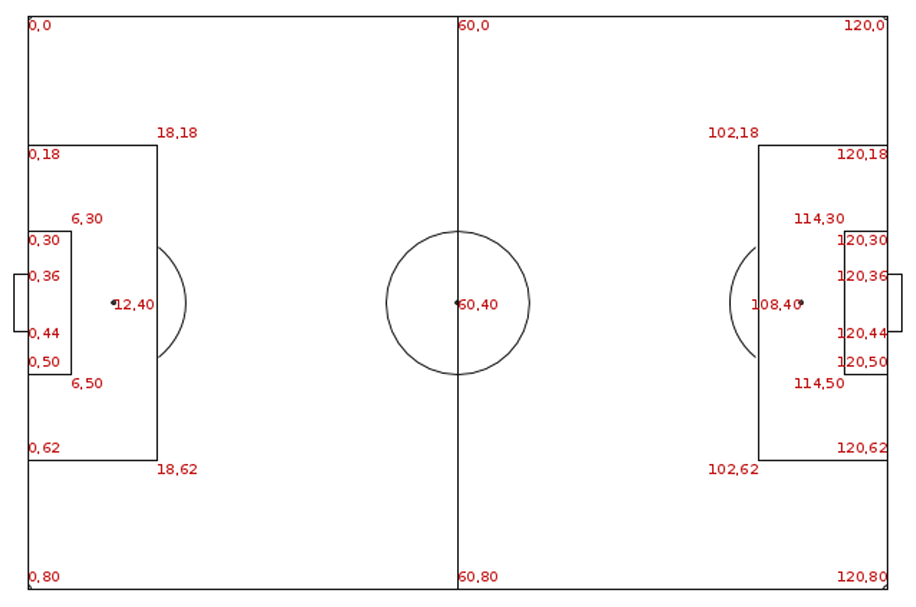

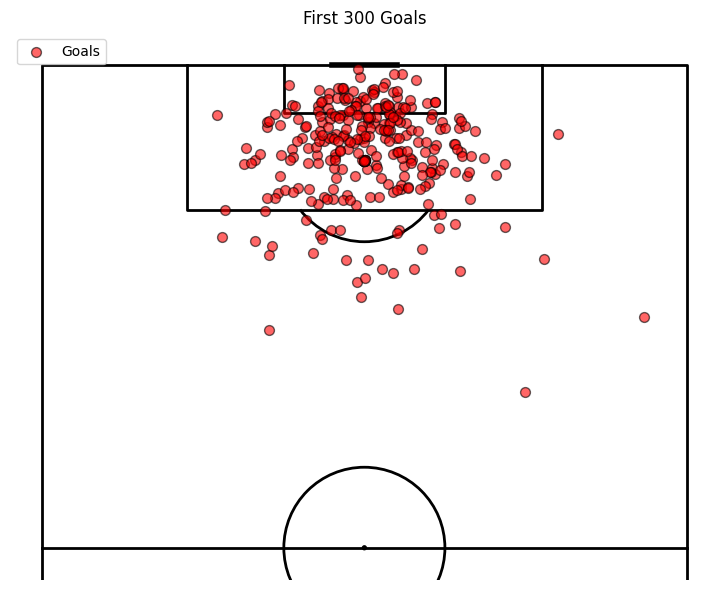

In [ ]:
#All shots are mapped onto one goal in the Statsbomb data, allowing visualization using just half the pitch.

first_300_goals = shots_master_df[shots_master_df['outcome_name'] == 'Goal'].iloc[:300]

pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half = True)
fig, ax = pitch.draw(figsize=(10, 6))

pitch.scatter(first_300_goals['x'], first_300_goals['y'], ax=ax, color='red', edgecolors='black',alpha = 0.6, s=50, label='Goals')

plt.title('First 300 Goals')
plt.legend(loc = 'upper left')
plt.show()

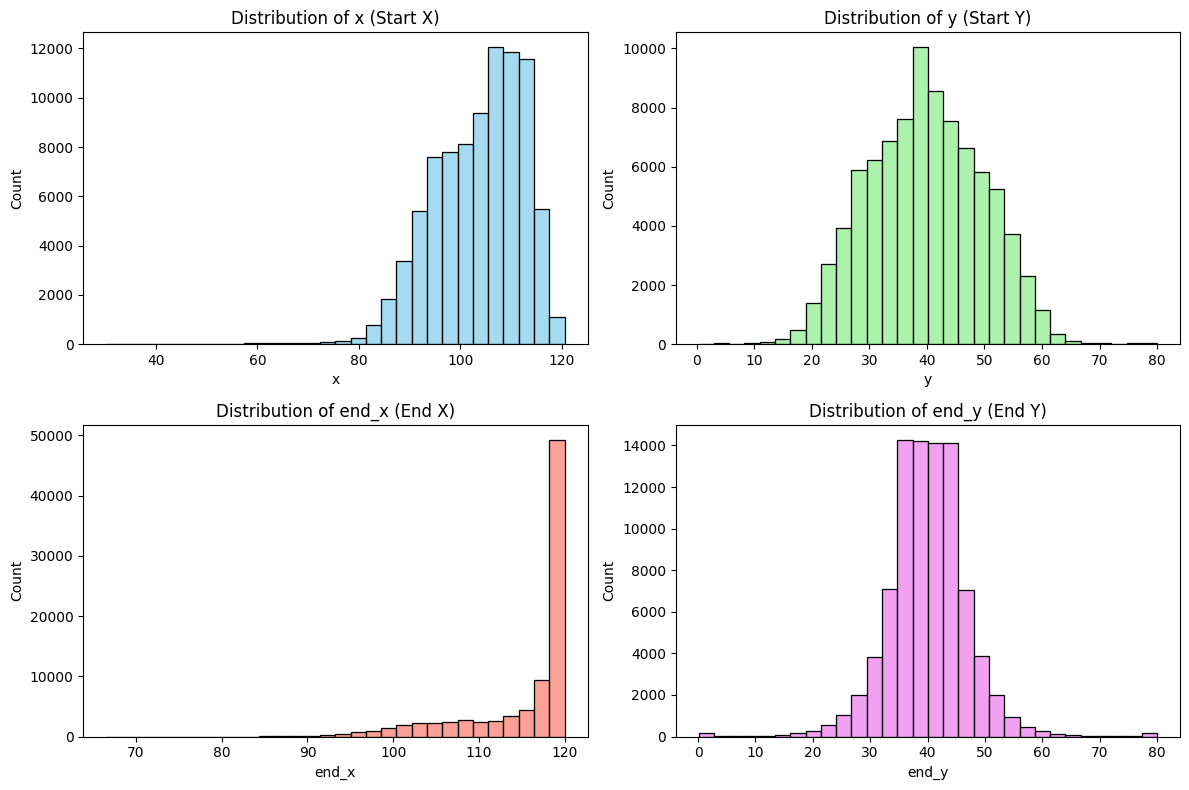

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(shots_master_df['x'], bins=30, kde=False, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of x (Start X)')

sns.histplot(shots_master_df['y'], bins=30, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Distribution of y (Start Y)')

sns.histplot(shots_master_df['end_x'], bins=30, kde=False, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Distribution of end_x (End X)')

sns.histplot(shots_master_df['end_y'], bins=30, kde=False, ax=axs[1, 1], color='violet')
axs[1, 1].set_title('Distribution of end_y (End Y)')

plt.tight_layout()
plt.show()


In [ ]:
#We can see that the shots are directed towards the goal with the center located at x = 120, y = 40. Strong outliers are considered very bad attempts.
#IMPORTANT: Statbomb uses the coordinates to standardize their measurements across pitches of different sizes. This is useful for modeling and plotting, especially for visual consistency across competitions and leagues.
#Therefore, the distance to goal is not calculated in meters but in pitch units. It can be calculated using Eukledian Distance.

GOAL_CENTER_X = 120
GOAL_CENTER_Y = 40

shots_master_df['distance_to_goal'] = np.sqrt(
    (GOAL_CENTER_X - shots_master_df['x'])**2 +
    (GOAL_CENTER_Y - shots_master_df['y'])**2
)

shots_master_df[['id','period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'distance_to_goal', 'match_id', 'outcome_name']].head()

id  period        timestamp  team_id  \
0  c577e730-b9f5-44f2-9257-9e7730c23d7b       1  00:06:48.773000      176   
1  bbc2c68d-c096-483d-abf4-32c0175a0f55       1  00:07:40.953000      904   
2  12b5206b-9ed0-4b1e-9ec3-f2028187e09f       1  00:11:08.471000      176   
3  b2c3d59d-3bef-4f8a-ad86-26b69940c64e       1  00:13:16.073000      904   
4  bb53b537-1685-4019-9e8f-98f3805828eb       1  00:16:00.956000      904   

          team_name  player_id                  player_name      x     y  \
0     Werder Bremen     8826.0         Leonardo Bittencourt  100.4  35.1   
1  Bayer Leverkusen    38004.0  Piero Mart√≠n Hincapi√© Reyna  114.6  33.5   
2     Werder Bremen    51769.0              Juli√°n Malatini  106.2  55.8   
3  Bayer Leverkusen     8221.0                 Jonathan Tah  113.9  47.4   
4  Bayer Leverkusen     3500.0                 Granit Xhaka   89.2  42.5   

   distance_to_goal  match_id outcome_name  
0         20.203218   3895302      Blocked  
1          8.450444   3895302        Saved  
2         20.978084   3895302      Blocked  
3          9.590099   3895302      Blocked  
4         30.901294   3895302      Blocked

In [ ]:
#TO DO: Plot distance to goal scatter plot

In [ ]:
#Now I want to visualy show an example how distance to goal works. Let's look at a random match of Spain's women in the 2023 World Cup
parser = Sbopen()
matches_df = parser.match(competition_id=72, season_id=107)
matches_df = matches_df[(matches_df["home_team_name"] == "Spain Women's")|(matches_df["away_team_name"] == "Spain Women's")]
print(matches_df['match_id'].unique())

dis_to_goal_df = shots_master_df[['id','period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'distance_to_goal', 'match_id', 'outcome_name']]

goals_df = dis_to_goal_df[
    (dis_to_goal_df['match_id'] == 3902240) &
    (dis_to_goal_df['outcome_name'] == 'Goal')
]

goals_df.head()

[3906390 3904628 3893806 3893822 3902240 3901733 3893791]


id  period        timestamp  team_id  \
84554  7c9b6e01-2124-4135-9fb7-81350a3b474e       2  00:35:16.785000      863   
84560  723925a1-dbde-4898-a8be-bbabe9588e56       2  00:45:50.961000      851   
84571  4e9448ed-25c8-4538-a023-8829ec229c42       4  00:05:36.645000      863   

                 team_name  player_id                       player_name  \
84554        Spain Women's    10161.0  Mar√≠a Francesca Caldentey Oliver   
84560  Netherlands Women's    10647.0           Stephanie van der Gragt   
84571        Spain Women's   222682.0         Salma Paralluelo Ayingono   

           x     y  distance_to_goal  match_id outcome_name  
84554  108.1  40.1         11.900420   3902240         Goal  
84560  102.8  50.4         20.099751   3902240         Goal  
84571  106.4  30.3         16.704790   3902240         Goal

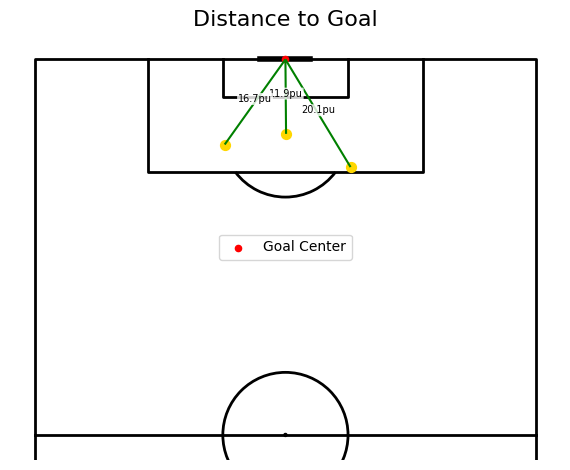

In [ ]:
GOAL_CENTER_X = 120
GOAL_CENTER_Y = 40


pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half = True)
fig, ax = pitch.draw(
    #figsize=(6, 10)
)

pitch.scatter(GOAL_CENTER_X, GOAL_CENTER_Y, s=20, c='red', ax=ax, label='Goal Center')

for _, row in goals_df.iterrows():
    shot_x = row['x']
    shot_y = row['y']
    distance = row['distance_to_goal']

    pitch.scatter(shot_x, shot_y, ax=ax, c='gold', s=50)

    pitch.lines(shot_x, shot_y, GOAL_CENTER_X, GOAL_CENTER_Y, ax=ax, color='green', lw=1.5)

    mid_x = (shot_x + GOAL_CENTER_X) / 2
    mid_y = (shot_y + GOAL_CENTER_Y) / 2
    pitch.annotate(
      f"{distance:.1f}pu",
      xy=(mid_x, mid_y),
      ax=ax,
      fontsize=7,
      ha='center',
      color='black',
      bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round', pad=0.1)
    )

ax.set_title('Distance to Goal', fontsize=16)
ax.legend()
plt.show()

#One goal was a penalty. Because the coordinate system penalty spot is at 108,40 and the center of the goal is at 120,40 distance_to_goal is 12.

In [ ]:
#The next feature to consider is the angle to the goal. For that the goalposts need to be considered.

#Goalposts y-coordinates
goal_y1 = 36  #left post
goal_y2 = 44  #right post
GOAL_WIDTH = 8

#Shot coordinates
x = shots_master_df['x'].to_numpy()
y = shots_master_df['y'].to_numpy()

#Distances from shot to left and right goalposts
a = np.sqrt((GOAL_CENTER_X - x)**2 + (goal_y1 - y)**2)
b = np.sqrt((GOAL_CENTER_X - x)**2 + (goal_y2 - y)**2)
c = GOAL_WIDTH

denominator = 2 * a * b
cos_angle = (a**2 + b**2 - c**2) / denominator
cos_angle = np.clip(cos_angle, -1.0, 1.0)

angle_radians = np.arccos(cos_angle)

shots_master_df['angle_to_goal'] = angle_radians
shots_master_df['angle_to_goal_deg'] = np.degrees(angle_radians)

In [ ]:
angle_to_goal_df = shots_master_df[['id' ,'period', 'timestamp', 'team_id', 'team_name', 'player_id', 'player_name', 'x', 'y', 'angle_to_goal','angle_to_goal_deg', 'match_id', 'outcome_name']]

goal_angles_df = angle_to_goal_df[
    (angle_to_goal_df['match_id'] == 3902240) &
    (angle_to_goal_df['outcome_name'] == 'Goal')
]

goal_angles_df.head()

id  period        timestamp  team_id  \
84554  7c9b6e01-2124-4135-9fb7-81350a3b474e       2  00:35:16.785000      863   
84560  723925a1-dbde-4898-a8be-bbabe9588e56       2  00:45:50.961000      851   
84571  4e9448ed-25c8-4538-a023-8829ec229c42       4  00:05:36.645000      863   

                 team_name  player_id                       player_name  \
84554        Spain Women's    10161.0  Mar√≠a Francesca Caldentey Oliver   
84560  Netherlands Women's    10647.0           Stephanie van der Gragt   
84571        Spain Women's   222682.0         Salma Paralluelo Ayingono   

           x     y  angle_to_goal  angle_to_goal_deg  match_id outcome_name  
84554  108.1  40.1       0.648501          37.156345   3902240         Goal  
84560  102.8  50.4       0.340802          19.526500   3902240         Goal  
84571  106.4  30.3       0.392183          22.470456   3902240         Goal

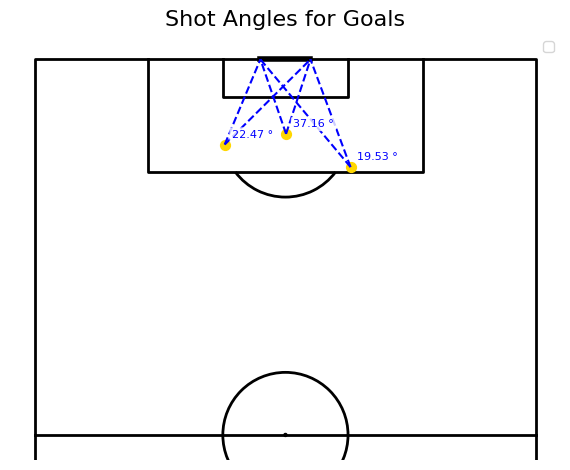

In [ ]:
goal_x, goal_y = 120, 40
left_post_y = 36
right_post_y = 44
goal_width = 8

pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', half=True)
fig, ax = pitch.draw()

for i, row in goal_angles_df.iterrows():
    shot_x = row['x']
    shot_y = row['y']
    angle = row['angle_to_goal_deg']

    pitch.scatter(shot_x, shot_y, ax=ax, c='gold', s=50, label='Goal' if i == 0 else None)

    pitch.lines(shot_x, shot_y, goal_x, left_post_y, ax=ax, color='blue', lw=1.5, linestyle='--')
    pitch.lines(shot_x, shot_y, goal_x, right_post_y, ax=ax, color='blue', lw=1.5, linestyle='--')

    pitch.annotate(
        f"{angle:.2f} ¬∞",
        xy=(shot_x, shot_y),
        ax=ax,
        fontsize=8,
        ha='left',
        color='blue',
        xytext=(5, 5),
        textcoords='offset points',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round' ,pad=0.2)
    )

ax.set_title('Shot Angles for Goals', fontsize=16)
ax.legend()
plt.show()

#For the penalty, if placed perfectly at 108, 40 the angle would be ~36.9¬∞.
#However, this specific penalty is placed at 108.1, 40.1 which equals an angle of 37.2¬∞

In [ ]:
#Another feature that is intuetively relevent would be how many players are between the goal and the shoot position.
#My first idea is to reuse the triangle used to calculated the angle for this and identify all players within the triangle as "in the way".
#I want to distinct between teammates and opponents as the teammates will try to avoid blocking the shoot and the opponents obviously wont.

df_event, df_related, df_freeze, df_tactics = parser.event(3902240)
first_goal_freeze_df = df_freeze[df_freeze["id"] == '723925a1-dbde-4898-a8be-bbabe9588e56']
first_goal_freeze_df.head(3)

teammate  match_id                                    id      x     y  \
253     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56  101.3  50.2   
254     False   3902240  723925a1-dbde-4898-a8be-bbabe9588e56  100.5  42.2   
255      True   3902240  723925a1-dbde-4898-a8be-bbabe9588e56   89.6  47.4   

     player_id               player_name  position_id  \
253      10165   Irene Paredes Hernandez            3   
254      49889  Oihane Hern√°ndez Zurbano            2   
255      10654            Jackie Groenen           11   

               position_name  event_freeze_id  
253        Right Center Back                1  
254               Right Back                2  
255  Left Defensive Midfield                3

In [ ]:
all_freeze_frames = []

shots_grouped = shots_master_df.groupby('match_id')

for match_id, shots_in_match in tqdm(shots_grouped, total=len(shots_grouped), desc="Getting freeze frames"):

    try:
        _, _, df_freeze, _ = parser.event(match_id)

        if df_freeze is None or df_freeze.empty:
            continue

        shot_ids = shots_in_match['id'].unique()
        df_filtered_freeze = df_freeze[df_freeze['id'].isin(shot_ids)].copy()

        if df_filtered_freeze.empty:
            continue

        df_filtered_freeze['match_id'] = match_id

        all_freeze_frames.append(df_filtered_freeze)

    except Exception as e:
        print(f"‚ùå Error fetching freeze frames for match {match_id}: {e}")

if all_freeze_frames:
    freeze_master_df = pd.concat(all_freeze_frames, ignore_index=True)
    print("‚úÖ Freeze frame data collected:", freeze_master_df.shape)
else:
    print("‚ö†Ô∏è No freeze frame data was collected.")


Getting freeze frames:   0%|          | 5/3433 [00:03<40:48,  1.40it/s]


KeyboardInterrupt: 

In [ ]:
freeze_master_df.to_csv("freeze_master_df.csv", index=False)

NameError: name 'freeze_master_df' is not defined

In [ ]:
file_id = '1ut7kYQAxmXQfavlHvYD_EGoWu8rMWlcQ'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'freeze_master_df.csv'

gdown.download(url, output, quiet=False)

freeze_master_df = pd.read_csv(output)

print(freeze_master_df.shape)
freeze_master_df.head(5)

Downloading...
From (original): https://drive.google.com/uc?id=1ut7kYQAxmXQfavlHvYD_EGoWu8rMWlcQ
From (redirected): https://drive.google.com/uc?id=1ut7kYQAxmXQfavlHvYD_EGoWu8rMWlcQ&confirm=t&uuid=e69c2e02-527a-4589-8316-88c1df106520
To: /content/freeze_master_df.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 119M/119M [00:01<00:00, 62.8MB/s]


(1110839, 10)


teammate  match_id                                    id      x     y  \
0      True      7298  9b82eaa3-2048-4157-aa9a-eabeb4fa0ebe   97.0  48.0   
1      True      7298  9b82eaa3-2048-4157-aa9a-eabeb4fa0ebe  113.0  38.0   
2     False      7298  9b82eaa3-2048-4157-aa9a-eabeb4fa0ebe  112.0  28.0   
3     False      7298  9b82eaa3-2048-4157-aa9a-eabeb4fa0ebe  103.0  50.0   
4     False      7298  9b82eaa3-2048-4157-aa9a-eabeb4fa0ebe  120.0  26.0   

   player_id            player_name  position_id         position_name  \
0      17275  Hannah Jayne Blundell           12        Right Midfield   
1       4638            Drew Spence           15  Left Center Midfield   
2       4649       Esme Beth Morgan            2            Right Back   
3       4635        Julia Spetsmark           21             Left Wing   
4       4637          Ellie Roebuck            1            Goalkeeper   

   event_freeze_id  
0                1  
1                2  
2                3  
3                4  
4                5

In [ ]:
freeze_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110839 entries, 0 to 1110838
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   teammate         1110839 non-null  bool   
 1   match_id         1110839 non-null  int64  
 2   id               1110839 non-null  object 
 3   x                1110839 non-null  float64
 4   y                1110839 non-null  float64
 5   player_id        1110839 non-null  int64  
 6   player_name      1110839 non-null  object 
 7   position_id      1110839 non-null  int64  
 8   position_name    1110839 non-null  object 
 9   event_freeze_id  1110839 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 77.3+ MB


In [ ]:
left_post = np.array([120, 36])
right_post = np.array([120, 44])

def point_in_triangle(pt, v1, v2, v3):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(pt, v1, v2) < 0.0
    b2 = sign(pt, v2, v3) < 0.0
    b3 = sign(pt, v3, v1) < 0.0

    return ((b1 == b2) and (b2 == b3))

In [ ]:
from tqdm import tqdm

freeze_grouped = freeze_master_df.groupby(['match_id', 'id'])

shots_master_df['opponents_in_way'] = 0
shots_master_df['teammates_in_way'] = 0

for idx, shot in tqdm(shots_master_df.iterrows(), total=len(shots_master_df), desc="Counting players in triangle"):
    match_id = shot['match_id']
    event_id = shot['id']
    shooter_team_id = shot['team_id']
    shot_x = shot['x']
    shot_y = shot['y']

    try:
        freeze = freeze_grouped.get_group((match_id, event_id))
    except KeyError:
        continue

    v1 = np.array([shot_x, shot_y])
    v2 = left_post
    v3 = right_post

    opponents = 0
    teammates = 0

    for _, row in freeze.iterrows():
        #if row['position_name'] == 'Goalkeeper':
        #    continue

        player_x = row['x']
        player_y = row['y']
        player_team_id = row['teammate']

        pt = np.array([player_x, player_y])
        if point_in_triangle(pt, v1, v2, v3):
            if player_team_id:
                teammates += 1
            else:
                opponents += 1

    shots_master_df.at[idx, 'opponents_in_way'] = opponents
    shots_master_df.at[idx, 'teammates_in_way'] = teammates


Counting players in triangle: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 87111/87111 [02:23<00:00, 605.07it/s]


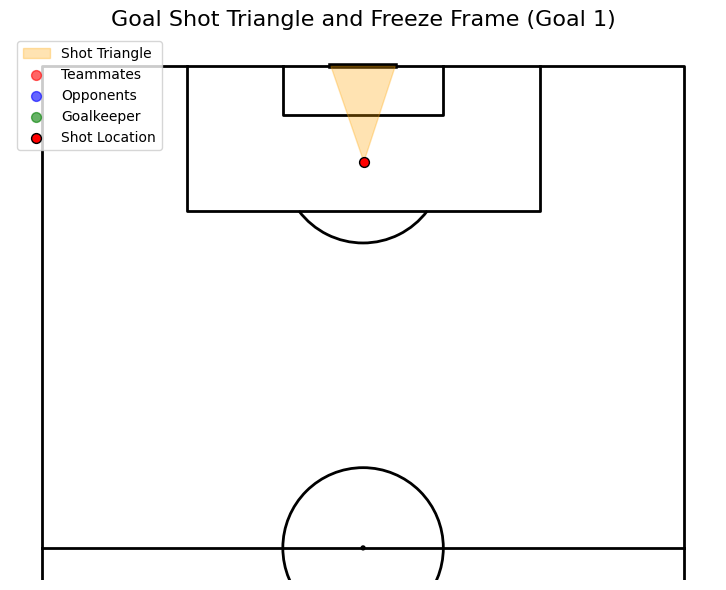

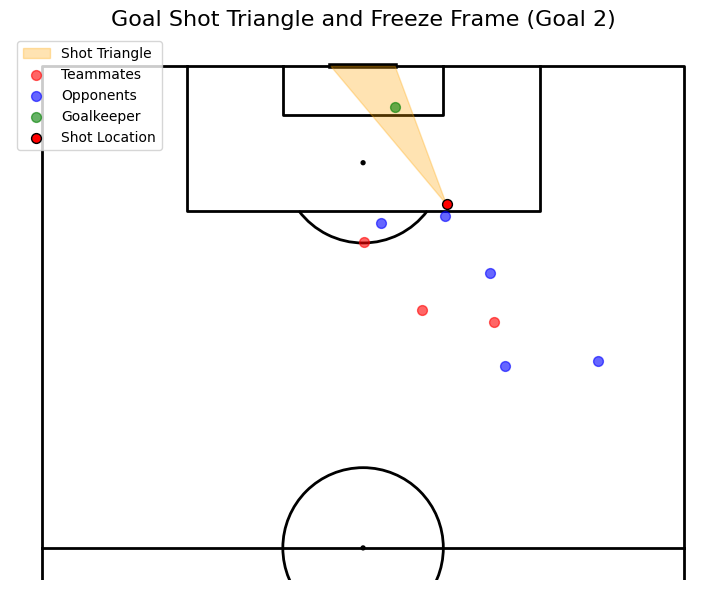

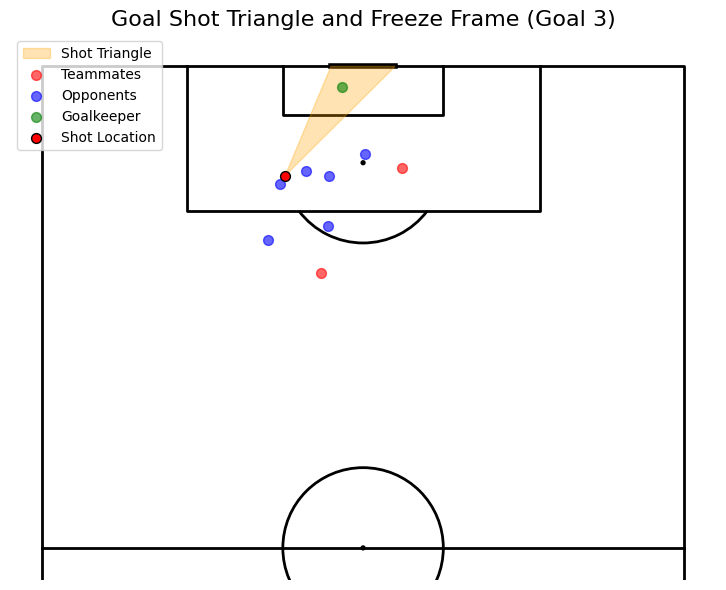

In [ ]:
left_post = np.array([120, 36])
right_post = np.array([120, 44])

goal_ids = [
    '7c9b6e01-2124-4135-9fb7-81350a3b474e',
    '723925a1-dbde-4898-a8be-bbabe9588e56',
    '4e9448ed-25c8-4538-a023-8829ec229c42'
]

match_id = 3902240

goal_shots = shots_master_df[
    (shots_master_df['match_id'] == match_id) & (shots_master_df['id'].isin(goal_ids))
]

for i, (_, shot) in enumerate(goal_shots.iterrows(), 1):
    shot_id = shot['id']
    shot_loc = np.array([shot['x'], shot['y']])

    freeze = freeze_master_df[
        (freeze_master_df['match_id'] == match_id) & (freeze_master_df['id'] == shot_id)
    ]

    teammates = freeze[freeze['teammate'] == True]
    opponents = freeze[freeze['teammate'] == False]
    goalkeeper = opponents[opponents['position_name'] == 'Goalkeeper']
    other_opponents = opponents[opponents['position_name'] != 'Goalkeeper']

    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='white', line_color='black', half = True)
    fig, ax = pitch.draw(
        figsize=(10, 6)
    )

    triangle = np.array([shot_loc, left_post, right_post])
    pitch.polygon([triangle], ax=ax, color='orange', alpha=0.3, edgecolor='black', label='Shot Triangle')

    pitch.scatter(teammates['x'], teammates['y'], ax=ax, color='red', label='Teammates', alpha=0.6, s=50)
    pitch.scatter(other_opponents['x'], other_opponents['y'], ax=ax, color='blue', label='Opponents', alpha=0.6, s=50)
    pitch.scatter(goalkeeper['x'], goalkeeper['y'], ax=ax, color='green', label='Goalkeeper', alpha=0.6, s=50)

    pitch.scatter([shot_loc[0]], [shot_loc[1]], ax=ax, color='red',edgecolor = 'black', s=50, label='Shot Location')

    ax.set_title(f"Goal Shot Triangle and Freeze Frame (Goal {i})", fontsize=16)
    ax.legend(loc='upper left')
    plt.show()


In [ ]:
#Looking at the plots from above it might be that for penalties there is no freeze_frame and therefore no goalkeeper can be seen.


# Set opponents_in_way to 1 where sub_type_name is 'Penalty'
shots_master_df.loc[shots_master_df['sub_type_name'] == 'Penalty', 'opponents_in_way'] = 1

shots_master_df.groupby('sub_type_name')[['opponents_in_way', 'teammates_in_way']].mean().sort_values(by='opponents_in_way', ascending=False)


#As we will filter apply the models only to open play goals and therefore filter dataset anyways, this is not big of a deal.

opponents_in_way  teammates_in_way
sub_type_name                                    
Free Kick              3.614309          0.735845
Kick Off               3.000000          0.000000
Open Play              1.660777          0.160550
Penalty                1.000000          0.000763
Corner                 0.000000          0.000000

In [ ]:
#In case the distinction between opponents and teammates does not matter I also create a players_in_way column which sums both opponents and teammates per shot.
shots_master_df['players_in_way'] = shots_master_df['opponents_in_way'] + shots_master_df['teammates_in_way']

In [ ]:
#The next feature of interest could be if the shot is performed with the dominant or the non-dominant foot.
num_players = shots_master_df['player_id'].nunique()
print(f"Number of unique players: {num_players}")



Number of unique players: 6069


In [ ]:
file_id_dominant = '1y14w6jD-X2B2opaX6uCCgup0gsQW_EJz'
url = f'https://drive.google.com/uc?id={file_id_dominant}'

dominant_foot_df = pd.read_csv(url)

print(dominant_foot_df.shape)
dominant_foot_df.head(15)


(5129, 6)


player_id              player_name     soccerdonna_match  similarity  \
0     10102.0             Stine Larsen          Stine Larsen  100.000000   
1     15623.0         Vivianne Miedema      Vivianne Miedema  100.000000   
2     10650.0               Jill Roord            Jill Roord  100.000000   
3     15619.0             Bethany Mead             Beth Mead   85.714286   
4     18999.0          Leah Williamson       Leah Williamson  100.000000   
5     10658.0     Danielle van de Donk  Dani√´lle van de Donk   95.000000   
6     10404.0            Noelle Maritz         Noelle Maritz  100.000000   
7     10192.0             Jordan Nobbs          Jordan Nobbs  100.000000   
8     15620.0             Katie McCabe          Katie McCabe  100.000000   
9     10179.0               Lisa Evans            Lisa Evans  100.000000   
10    11338.0       Caitlin Jade Foord         Caitlin Foord   95.000000   
11    49697.0      Carlotte Wubben-Moy      Lotte Wubben-Moy   85.714286   
12    15421.0               Kenza Dali            Kenza Dali  100.000000   
13    10124.0     Dagn√Ω Brynjarsd√≥ttir  Dagn√Ω Brynjarsd√≥ttir  100.000000   
14     5076.0  Emily Louise van Egmond      Emily van Egmond   95.000000   

   dominant_foot matched_name  
0          right          NaN  
1          right          NaN  
2          right          NaN  
3          right          NaN  
4          right          NaN  
5          right          NaN  
6           both          NaN  
7          right          NaN  
8           left          NaN  
9          right          NaN  
10          left          NaN  
11         right          NaN  
12         right          NaN  
13         right          NaN  
14         right          NaN

In [ ]:
dominant_foot_subset = dominant_foot_df[['player_id', 'dominant_foot']]

shots_master_df = shots_master_df.merge(
    dominant_foot_subset,
    on='player_id',
    how='left'
)

print(shots_master_df.shape)
shots_master_df.head()

(87215, 54)


id  index  match_id  period  \
0  c577e730-b9f5-44f2-9257-9e7730c23d7b    436   3895302       1   
1  bbc2c68d-c096-483d-abf4-32c0175a0f55    480   3895302       1   
2  12b5206b-9ed0-4b1e-9ec3-f2028187e09f    597   3895302       1   
3  b2c3d59d-3bef-4f8a-ad86-26b69940c64e    684   3895302       1   
4  bb53b537-1685-4019-9e8f-98f3805828eb    848   3895302       1   

         timestamp  team_id         team_name  player_id  \
0  00:06:48.773000      176     Werder Bremen     8826.0   
1  00:07:40.953000      904  Bayer Leverkusen    38004.0   
2  00:11:08.471000      176     Werder Bremen    51769.0   
3  00:13:16.073000      904  Bayer Leverkusen     8221.0   
4  00:16:00.956000      904  Bayer Leverkusen     3500.0   

                   player_name  position_id  ... possession_team_name  \
0         Leonardo Bittencourt         13.0  ...        Werder Bremen   
1  Piero Mart√≠n Hincapi√© Reyna          8.0  ...     Bayer Leverkusen   
2              Juli√°n Malatini          3.0  ...        Werder Bremen   
3                 Jonathan Tah          4.0  ...     Bayer Leverkusen   
4                 Granit Xhaka          9.0  ...     Bayer Leverkusen   

   play_pattern_id  play_pattern_name  distance_to_goal  angle_to_goal  \
0                3     From Free Kick         20.203218       0.380357   
1                1       Regular Play          8.450444       0.662204   
2                3     From Free Kick         20.978084       0.254675   
3                2        From Corner          9.590099       0.570985   
4                1       Regular Play         30.901294       0.256650   

   angle_to_goal_deg  opponents_in_way teammates_in_way  players_in_way  \
0          21.792845                 2                2               4   
1          37.941499                 1                0               1   
2          14.591831                 2                0               2   
3          32.715019                 1                0               1   
4          14.704957                 3                0               3   

  dominant_foot  
0         right  
1         right  
2         right  
3         right  
4          left  

[5 rows x 54 columns]

In [ ]:
print(shots_master_df['dominant_foot'].value_counts(dropna=False))

dominant_foot
right    58206
left     16119
NaN       8478
both      4412
Name: count, dtype: int64


In [ ]:
print(shots_master_df['body_part_name'].value_counts(dropna=False))

body_part_name
Right Foot    45728
Left Foot     27415
Head          13819
Other           253
Name: count, dtype: int64


In [ ]:
shots_master_df = shots_master_df[
    shots_master_df['dominant_foot'].notna() |
    (shots_master_df['body_part_name'].isin(['Head', 'Other']))
]
print(shots_master_df.shape)

(80244, 54)


In [ ]:
print(shots_master_df['dominant_foot'].value_counts(dropna=False))

dominant_foot
right    58206
left     16119
both      4412
NaN       1507
Name: count, dtype: int64


In [ ]:
print(shots_master_df['body_part_name'].value_counts(dropna=False))

body_part_name
Right Foot    40942
Left Foot     25230
Head          13819
Other           253
Name: count, dtype: int64


In [ ]:
import numpy as np

def is_with_dominant(row):
    body = row['body_part_name']
    dom = row['dominant_foot']
    if body == 'Right Foot':
        return dom in ['right', 'both']
    elif body == 'Left Foot':
        return dom in ['left', 'both']
    elif body in ['Head', 'Other']:
        return np.nan
    else:
        return np.nan

shots_master_df['with_dominant_foot'] = shots_master_df.apply(is_with_dominant, axis=1)

print(shots_master_df['with_dominant_foot'].value_counts(dropna=False))


with_dominant_foot
True     47920
False    18252
NaN      14072
Name: count, dtype: int64


In [ ]:
#The next feature is a boolean under pressure. It already exists in the data. The only thing left to do is filling the NaN values with 0
shots_master_df['under_pressure'] = shots_master_df['under_pressure'].fillna(0)
shots_master_df['under_pressure'] = shots_master_df['under_pressure'].astype(int)
shots_master_df['under_pressure'].value_counts(dropna=False)

selected_cols = ['shot_first_time', 'shot_one_on_one', 'shot_open_goal']

for col in selected_cols:
    shots_master_df[col] = shots_master_df[col].notna().astype(int)

In [ ]:
#Another feature could be the shot technique. For that I want to use one hot encodings.
technique_dummies = pd.get_dummies(shots_master_df['technique_name'], prefix='technique')
shots_master_df = pd.concat([shots_master_df, technique_dummies], axis=1)

In [ ]:
#The same idea appiles for types of play. Open Play shots might have lower scoring probability than penalties
subtype_dummies = pd.get_dummies(shots_master_df['sub_type_name'], prefix='subtype')
shots_master_df = pd.concat([shots_master_df, subtype_dummies], axis=1)

In [ ]:
# Mark headers explicitly
shots_master_df['is_header'] = (shots_master_df['body_part_name'] == 'Head').astype(int)

# Encode dominant foot: set neutral value (e.g., 0.5) for headers
shots_master_df['with_dominant_foot'] = np.where(
    shots_master_df['is_header'] == 1, 0.5,
    shots_master_df['with_dominant_foot'].map({True: 1, False: 0})
)

In [ ]:
shots_master_df['goal'] = shots_master_df.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [ ]:
shots_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80244 entries, 0 to 87210
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           80244 non-null  object 
 1   index                        80244 non-null  int64  
 2   match_id                     80244 non-null  int64  
 3   period                       80244 non-null  int64  
 4   timestamp                    80244 non-null  object 
 5   team_id                      80244 non-null  int64  
 6   team_name                    80244 non-null  object 
 7   player_id                    80244 non-null  float64
 8   player_name                  80244 non-null  object 
 9   position_id                  80244 non-null  float64
 10  position_name                80244 non-null  object 
 11  x                            80244 non-null  float64
 12  y                            80244 non-null  float64
 13  end_x                

In [ ]:
print(shots_master_df['body_part_name'].value_counts(dropna=False))


body_part_name
Right Foot    40942
Left Foot     25230
Head          13819
Other           253
Name: count, dtype: int64


In [ ]:
shots_master_df = shots_master_df[shots_master_df['body_part_name'].isin(['Right Foot', 'Left Foot', 'Head'])]

In [ ]:
print(shots_master_df['body_part_name'].value_counts(dropna=False))

body_part_name
Right Foot    40942
Left Foot     25230
Head          13819
Name: count, dtype: int64


In [ ]:
print(shots_master_df['technique_name'].value_counts(dropna=False))


technique_name
Normal           62543
Half Volley      10541
Volley            5067
Lob                794
Overhead Kick      416
Diving Header      331
Backheel           299
Name: count, dtype: int64


In [ ]:
# Group by technique_name and calculate goal rate
goal_rates_by_technique = (
    shots_master_df
    .groupby('technique_name')['goal']
    .agg(['count', 'sum'])
    .assign(goal_rate=lambda df: df['sum'] / df['count'])
    .sort_values('goal_rate', ascending=False)
)

print(goal_rates_by_technique)

                count   sum  goal_rate
technique_name                        
Lob               794   215   0.270781
Diving Header     331    70   0.211480
Volley           5067   628   0.123939
Normal          62543  6887   0.110116
Backheel          299    32   0.107023
Half Volley     10541  1088   0.103216
Overhead Kick     416    34   0.081731


In [ ]:
goal_rates_by_subtype = (
    shots_master_df
    .groupby('sub_type_name')['goal']
    .agg(['count', 'sum'])
    .assign(goal_rate=lambda df: df['sum'] / df['count'])
    .sort_values('goal_rate', ascending=False)
)

print(goal_rates_by_subtype)


               count   sum  goal_rate
sub_type_name                        
Penalty         1181   876   0.741744
Corner            24     8   0.333333
Open Play      74988  7826   0.104363
Free Kick       3797   244   0.064261
Kick Off           1     0   0.000000


In [ ]:
#Find rows where either Corner or Kick Off is active
rows_to_drop = (shots_master_df['subtype_Corner']) | (shots_master_df['subtype_Kick Off'])

#Drop those rows
shots_master_df = shots_master_df[~rows_to_drop]


In [ ]:
shots_master_df.drop(['subtype_Corner', 'subtype_Kick Off'], axis=1, inplace=True)

In [ ]:
shots_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79966 entries, 0 to 87210
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           79966 non-null  object 
 1   index                        79966 non-null  int64  
 2   match_id                     79966 non-null  int64  
 3   period                       79966 non-null  int64  
 4   timestamp                    79966 non-null  object 
 5   team_id                      79966 non-null  int64  
 6   team_name                    79966 non-null  object 
 7   player_id                    79966 non-null  float64
 8   player_name                  79966 non-null  object 
 9   position_id                  79966 non-null  float64
 10  position_name                79966 non-null  object 
 11  x                            79966 non-null  float64
 12  y                            79966 non-null  float64
 13  end_x                

In [ ]:
shots_master_df.to_csv("finished_preprocessing.csv", index=False)